# Direciton


1. Go to https://zoskinhealth.com/us/shop/
2. Click "Load More" on the website to see all the products.

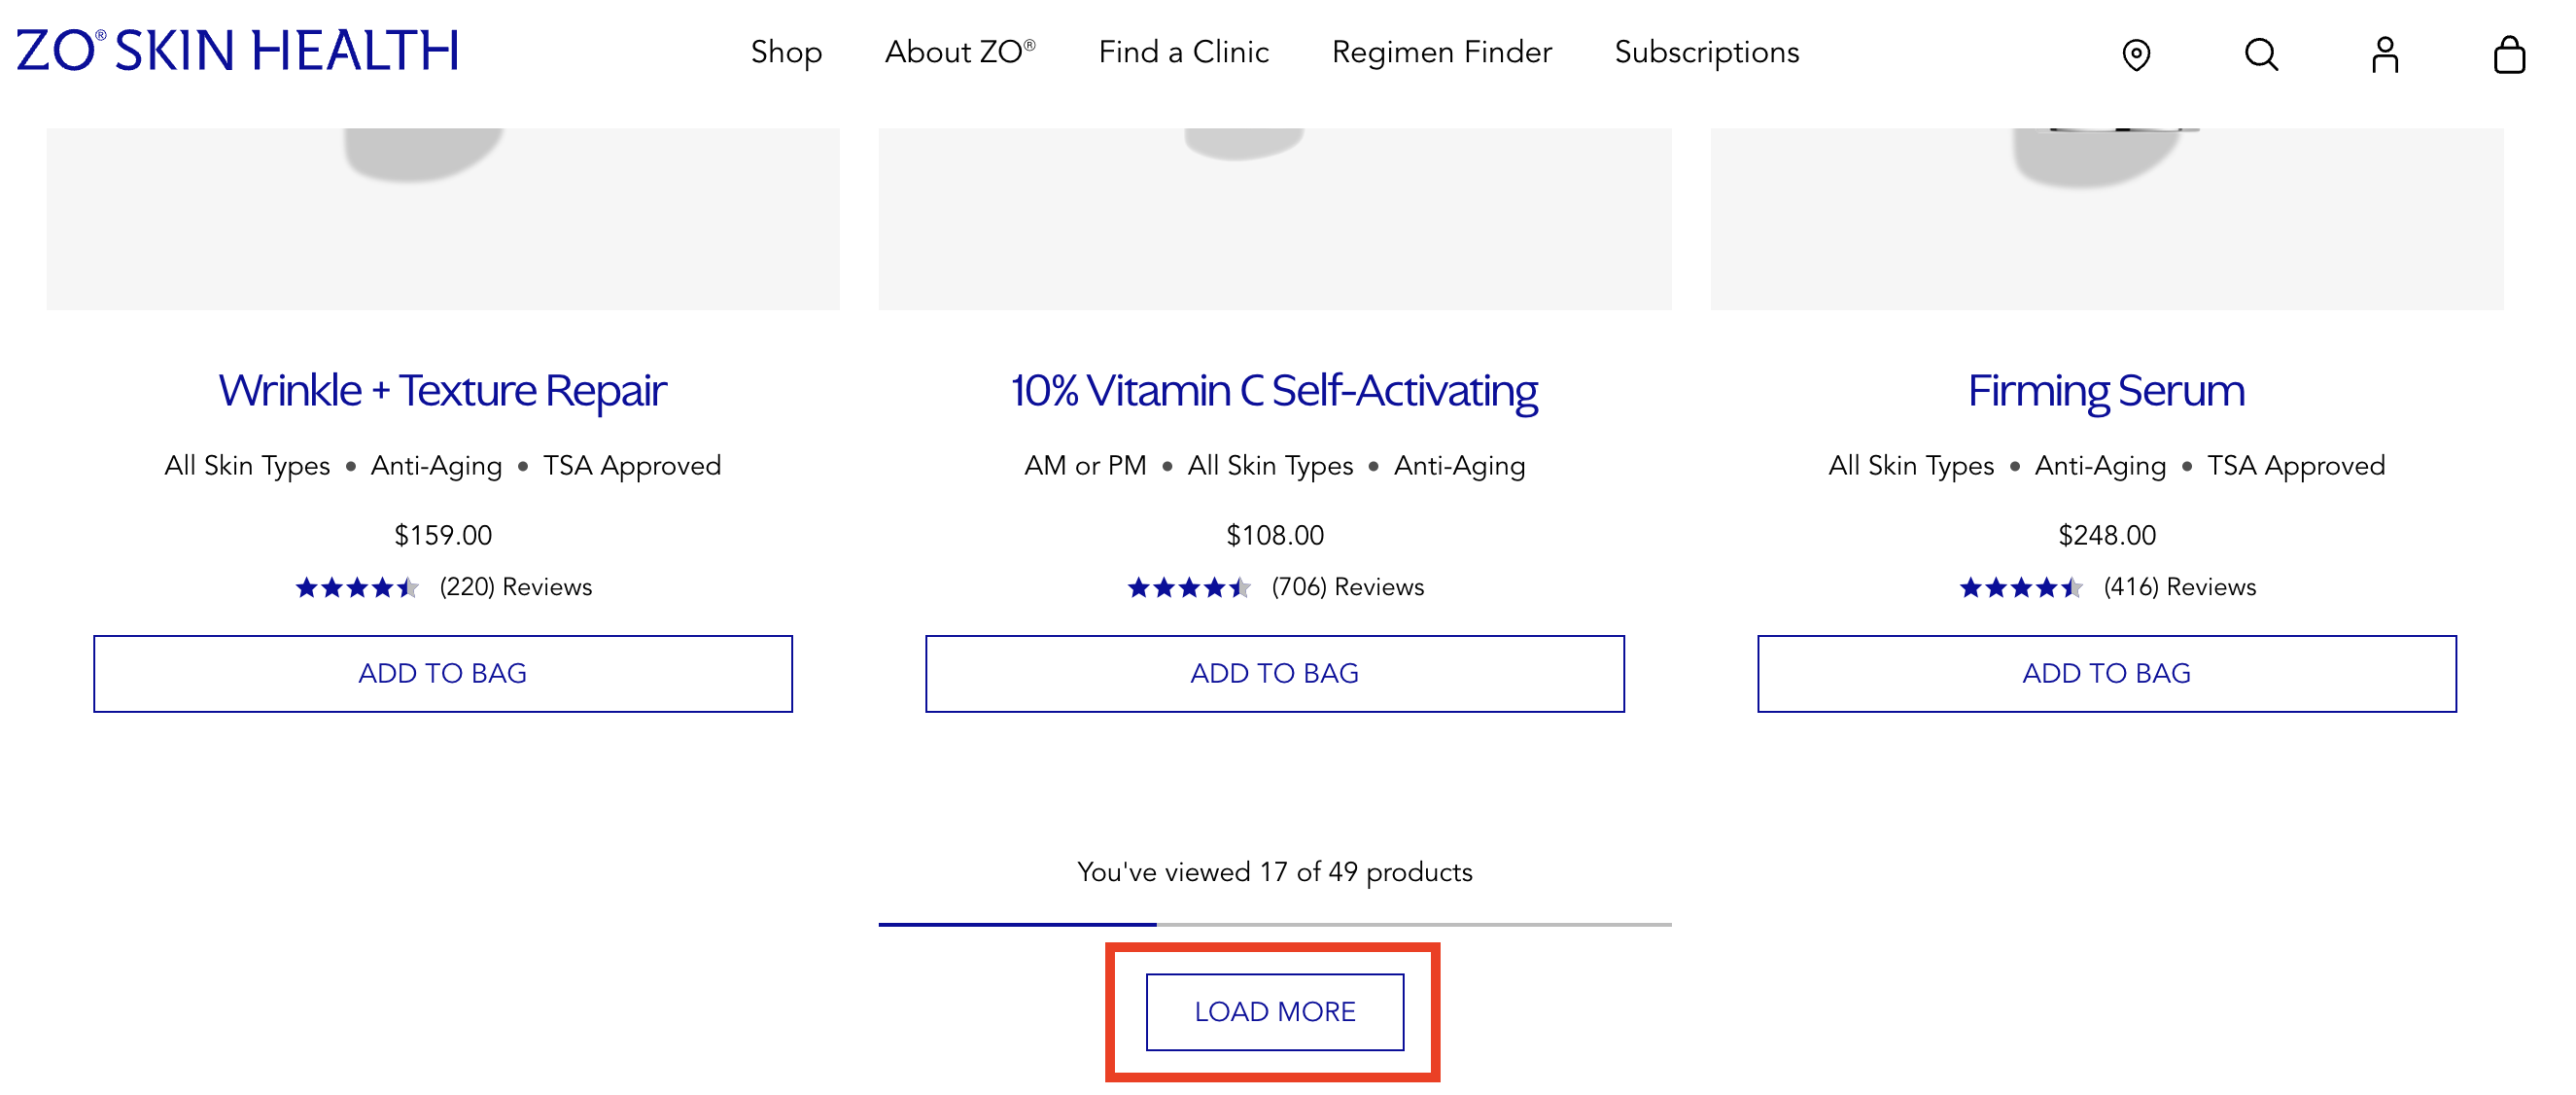

3. Press fn + F12 to inspect the body part of the HTML code.
4. Copy all the HTML code and paste it into the text below html = '''...'''.

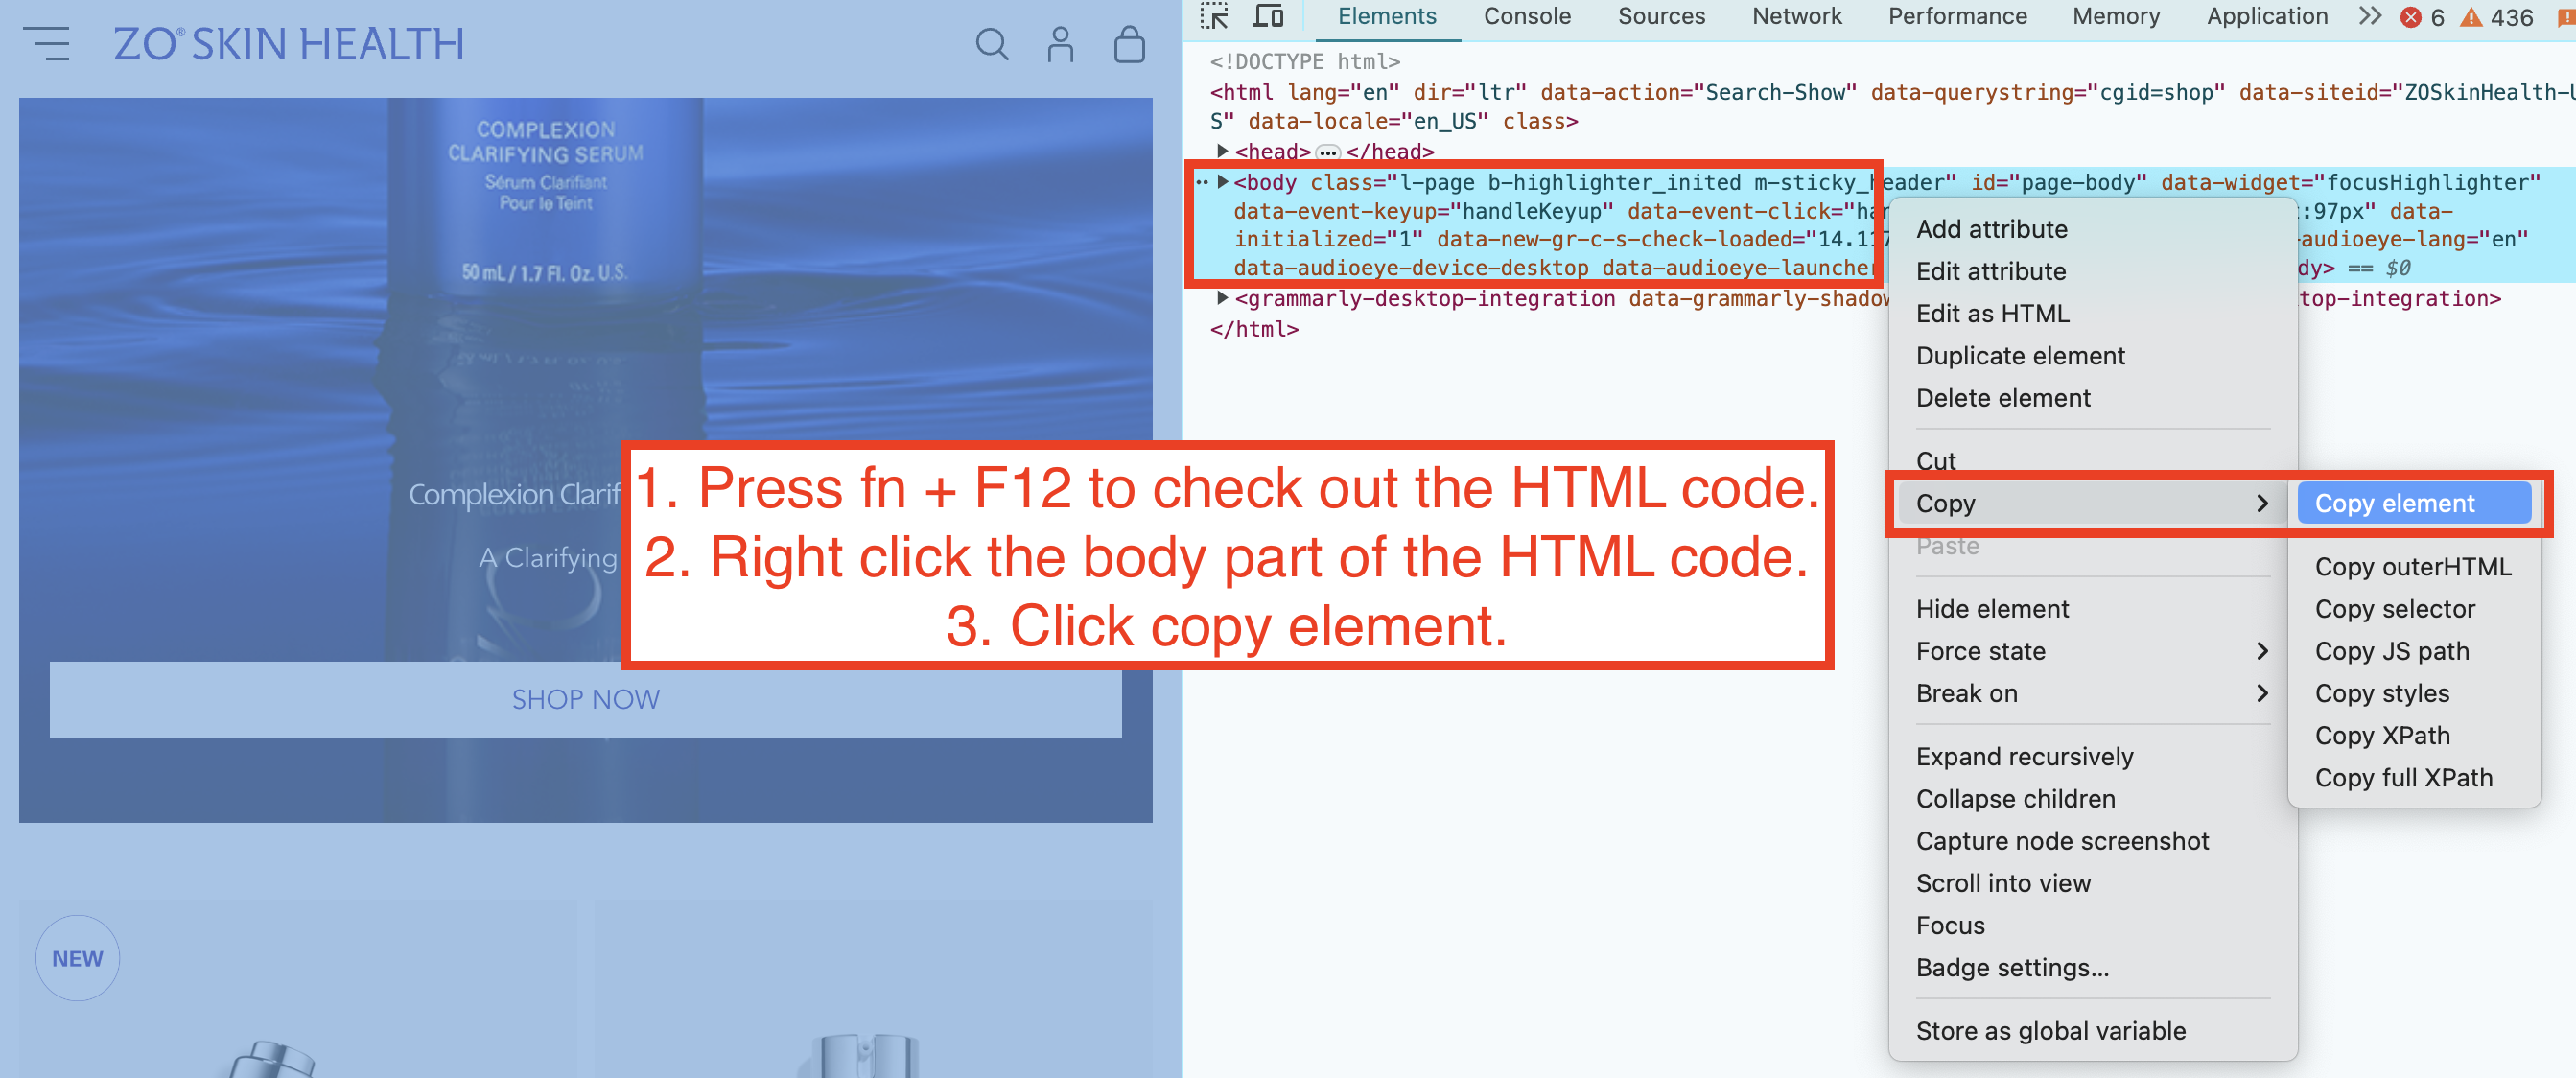

In [11]:
# html = '''...'''

## Get Product URLs

In [12]:
import re
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')
urls_list = [
    f"https://zoskinhealth.com{a_tag.get('href')}"
    for a_tag in soup.find_all('a', class_='b-product_tile-link')
    if a_tag.get('href')
]

# Filter URLs to remove any that do not match the correct pattern
filtered_urls_list = [url for url in urls_list if re.match(r'^https://zoskinhealth\.com/us/', url)]

all_urls = filtered_urls_list
print(len(filtered_urls_list))
print(all_urls)


49
['https://zoskinhealth.com/us/complexion-clarifying-serum-gbl-full-size-922700.html', 'https://zoskinhealth.com/us/daily-power-defense-gbl-full-size-969700.html', 'https://zoskinhealth.com/us/growth-factor-serum-gbl-full-size-904400.html', 'https://zoskinhealth.com/us/complexion-renewal-pads-gbl-full-size-928000.html', 'https://zoskinhealth.com/us/sheer-fluid-broad-spectrum-spf-50-us-full-size-916700.html', 'https://zoskinhealth.com/us/retinol-skin-brightener-1-gbl-full-size-950500.html', 'https://zoskinhealth.com/us/brightalive-gbl-full-size-940700.html', 'https://zoskinhealth.com/us/body-smoothing-creme-gbl-full-size-909900.html', 'https://zoskinhealth.com/us/balancing-cleansing-emulsion-gbl-full-size-916100.html', 'https://zoskinhealth.com/us/illuminating-aox-serum-gbl-full-size-969600.html', 'https://zoskinhealth.com/us/retinol-skin-brightener-05-gbl-full-size-950300.html', 'https://zoskinhealth.com/us/retinol-skin-brightener-025-gbl-full-size-950400.html', 'https://zoskinhealth

## Get Product Information

In [13]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def crawl_product_info(url):
    dom = requests.get(url).text
    soup = BeautifulSoup(dom, 'html.parser')

    # Get Product Title
    title_tag = soup.find('head').find('title')
    product_title = title_tag.text.strip()

    # Get Product Price
    price_span = soup.find('span', class_='b-price-item')
    price = price_span.text.strip() if price_span else "No Price"

    # Get Key Ingredients
    ingredients_string = ""
    target_tags = soup.find_all('dt', class_='b-product_ingredients-list_term')
    if target_tags:
        for tag in target_tags:
            text = tag.text.strip()
            ingredients_string += text + ", "
        ingredients_string = ingredients_string.rstrip(", ")
    else:
        ingredients_string = "No Key Ingredients."

    # Get All Ingredients
    ingredients = ''
    target_tag = soup.find('em')
    ingredients = target_tag.text.strip() if target_tag else "No Ingredients"

    # Get Benefits
    target_tag = soup.find('div', class_='b-product_details-disclosure_content_inner')
    benefits = target_tag.text.strip() if target_tag else "No benefits."

    # Get directions
    target_tag = soup.find('div', class_='b-product_ingredients-text')
    directions = target_tag.text.strip() if target_tag else "No directions."

    # Get Skin Type
    target_tag = soup.find('p', class_='b-product_indicators')
    if target_tag:
        items = [item.text.strip() for item in target_tag.find_all('a') + target_tag.find_all('span')]
        text = ', '.join(items)
        skintype = text
    else:
        skintype = 'No Skin Type'

    # Get Product Size
    size_span = soup.find('span', class_='b-variation_swatch-title', attrs={'data-tau': 'selected_size_name'})
    size = size_span.text.strip() if size_span else 'Not found'

    # Get Before and After Image URLs
    urls_string = ""
    target_tag = soup.find('div', {'data-widget': 'imageSlider'})
    if target_tag:
        text = target_tag.get('data-before-url', '')
        text2 = target_tag.get('data-after-url', '')
        urls_string = f"{text}, {text2}"
    else:
        urls_string = "No Images"

    return {
        'Product Title': product_title,
        'Product Price': price,
        'Key Ingredients': ingredients_string,
        'All Ingredients': ingredients,
        'Benefits': benefits,
        'Directions': directions,
        'Skin Types': skintype,
        'Size(oz)': size,
        'Before and After Image URLs': urls_string
    }

def main():

    data = []
    for url in all_urls:
        try:
            product_info = crawl_product_info(url)
            data.append(product_info)
        except Exception as e:
            print(f"Failed to scrape {url}: {e}")

    df = pd.DataFrame(data)
    return df

if __name__ == '__main__':
    df = main()
    print(df)


                                        Product Title Product Price  \
0   Complexion Clarifying Serum | ZO Skin Health, ...       $110.00   
1          Daily Power Defense | ZO Skin Health, Inc.       $173.00   
2          Growth Factor Serum | ZO Skin Health, Inc.       $168.00   
3      Complexion Renewal Pads | ZO Skin Health, Inc.        $59.00   
4   Sheer Fluid Broad-Spectrum Sunscreen SPF 50 | ...        $70.00   
5    Retinol Skin Brightener 1 | ZO Skin Health, Inc.       $145.00   
6                 Brightalive® | ZO Skin Health, Inc.       $145.00   
7         Body Smoothing Crème | ZO Skin Health, Inc.        $98.00   
8                        Balancing Cleansing Emulsion        $52.00   
9       Illuminating AOX Serum | ZO Skin Health, Inc.       $178.00   
10  Retinol Skin Brightener 0.5 | ZO Skin Health, ...       $124.00   
11  Retinol Skin Brightener 0.25 | ZO Skin Health,...       $110.00   
12     Growth Factor Eye Serum | ZO Skin Health, Inc.       $130.00   
13    

## Data Cleaning

In [14]:
# Data Cleaning
df2 = df.copy()
df2['Product URLs'] = all_urls
df2['Product Title'] = df2['Product Title'].apply(lambda x: x.split('|')[0].strip())
df2['Product Price'] = df2['Product Price'].str.replace('$', '')
df2['Directions'] = df2['Directions'].str.replace(r'Have questions on.*$', '', regex=True)
print(df2)

                                      Product Title Product Price  \
0                       Complexion Clarifying Serum        110.00   
1                               Daily Power Defense        173.00   
2                               Growth Factor Serum        168.00   
3                           Complexion Renewal Pads         59.00   
4       Sheer Fluid Broad-Spectrum Sunscreen SPF 50         70.00   
5                         Retinol Skin Brightener 1        145.00   
6                                      Brightalive®        145.00   
7                              Body Smoothing Crème         98.00   
8                      Balancing Cleansing Emulsion         52.00   
9                            Illuminating AOX Serum        178.00   
10                      Retinol Skin Brightener 0.5        124.00   
11                     Retinol Skin Brightener 0.25        110.00   
12                          Growth Factor Eye Serum        130.00   
13                             Rad

In [15]:
# Download Excel file
from google.colab import files
df2.to_excel('ZO Skin Health_products.xlsx', index=False)
files.download('ZO Skin Health_products.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>